In [1]:
import numpy as np

In [2]:
import numpy.random as rd

In [3]:
rd.seed(0)

In [4]:
popyt = np.array([14000, 13000, 14000, 14000, 15500, 10500, 16000, 8000, 5000, 11000, 8000, 15000])

In [5]:
buy_price = 80
sell_price = 100
price_outofseason = 40
transp = 100_000

In [6]:
zakupy = 12000

In [7]:
import matplotlib.pyplot as plt

(array([1., 0., 2., 0., 0., 2., 0., 1., 3., 3.]),
 array([ 5000.,  6100.,  7200.,  8300.,  9400., 10500., 11600., 12700.,
        13800., 14900., 16000.]),
 <BarContainer object of 10 artists>)

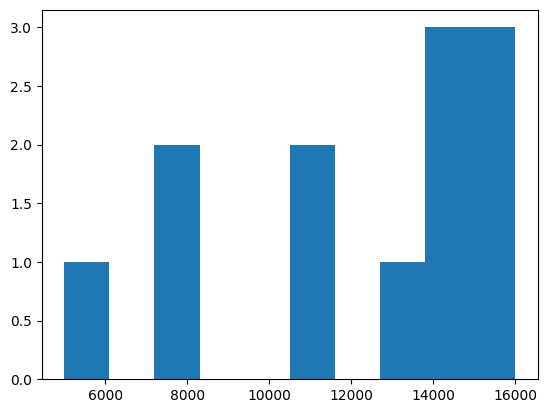

In [8]:
plt.hist(popyt)


In [9]:
avg = np.average(popyt)

In [10]:
std = np.std(popyt, ddof=1)

In [11]:
avg, std

(12000.0, 3496.7517394394367)

In [12]:
popyty = np.rint(rd.normal(avg, std, 1000)).astype('int')

In [13]:
popyty

array([18168, 13399, 15422, 19836, 18530,  8583, 15322, 11471, 11639,
       13436, 12504, 17085, 14661, 12425, 13552, 13167, 17224, 11283,
       13095,  9013,  3073, 14286, 15023,  9405, 19937,  6914, 12160,
       11345, 17360, 17138, 12542, 13322,  8896,  5074, 10783, 12547,
       16302, 16204, 10646, 10943,  8333,  7035,  6034, 18821, 10218,
       10468,  7619, 14719,  6357, 11256,  8869, 13353, 10214,  7872,
       11901, 13498, 12233, 13058,  9782, 10732,  9649, 10743,  9157,
        5964, 12620, 10595,  6300, 13618,  8827, 12182, 14549, 12451,
       15984,  7682, 13407,  9605,  8955,  9976, 10911, 12196,  7926,
       15150, 13628,  6628, 17204, 18629, 16122, 11371,  8256, 15687,
       10590, 16275, 12728, 15415, 13246, 14471, 12037, 18245, 12444,
       13406, 18585,  7287,  7557, 15390,  7898, 18796, 10554,  9386,
       18724, 17177, 18530, 15168,  8989, 18679, 11063, 14806, 15312,
       11458, 14147, 15225, 13316,  8156, 13043, 16638,  9571, 11477,
       10478, 18466,

In [14]:
def zysk(zakupy, popyty):
    koszty = (zakupy * buy_price + transp)
    utarg = (popyty >= zakupy) * sell_price * zakupy
    utarg += (popyty < zakupy) * popyty * sell_price + \
    (popyty < zakupy) * price_outofseason * (zakupy - popyty)
    zysk = utarg - koszty
    return zysk

In [15]:
popyty <= zakupy

array([False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False,  True,  True,
        True, False,

In [16]:
def symuluj(zakupy, liczba_sym, seed = 0):
    np.random.seed(seed)
    popyty = np.round(np.random.normal(avg, std, liczba_sym)).astype('int')
    zyski = zysk(zakupy, popyty)
    return zyski

In [17]:
zyski = symuluj(12000, 10000)

In [18]:
(np.mean(zyski), np.std(zyski))

(55556.378, 121783.8168584033)

In [19]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [20]:
import scipy.stats

In [21]:
import pandas as pd

In [22]:
scenariusze = [10000, 12000]

In [23]:
powtorzenia = 5000

In [24]:
data = []

In [25]:
for scenariusz in scenariusze:
    zyski = symuluj(scenariusz, powtorzenia)
    data.append(scipy.stats.describe(zyski))

In [31]:
new_df.insert(0, 'scenario', scenariusze)

In [27]:
df = pd.DataFrame(data)

In [28]:
df = df.rename(columns = {'variance':'std'})

In [29]:
df['std'].apply(lambda x: x**0.5)

0     79818.826969
1    121029.437388
Name: std, dtype: float64

In [30]:
new_df = df.drop_duplicates()

In [32]:
new_df


,scenario,nobs,minmax,mean,std,skewness,kurtosis
0,10000,5000,"(-564680, 100000)",63092.752,6.371045e+09,-2.677360,7.910159
1,12000,5000,"(-644680, 140000)",55821.980,1.464812e+10,-1.571545,2.100643


In [ ]:
# scipy.stats.ttest_ind  pozwala nam na wykazanie p

In [55]:
eksper = range(100, 16100, 100)

In [56]:
wyniki = [symuluj(zakupy, 10000) for zakupy in eksper]

In [57]:
wyniki = list(map(lambda x: (np.std(x), np.mean(x)), wyniki))

[(706.764659116456, -98007.068),
 (767.6597152384641, -96008.04),
 (832.4426120760515, -94009.24),
 (900.5648707339188, -92010.44),
 (971.3241428071266, -90011.64),
 (1044.184473357079, -88012.84),
 (1118.7354282402964, -86014.04),
 (1194.660546933731, -84015.24),
 (1271.713728163693, -82016.44),
 (1349.7017857289807, -80017.64),
 (1428.5980900785214, -78019.032),
 (1511.1280576192078, -76021.426),
 (1598.5214592478887, -74024.018),
 (1691.8304380463196, -72027.33),
 (1792.4212836038291, -70031.422),
 (1903.677485777462, -68037.512),
 (2028.9751001567272, -66044.712),
 (2167.547594840769, -64052.71),
 (2320.3045019057304, -62061.794),
 (2486.294909451411, -60071.394),
 (2663.6785381993823, -58081.444),
 (2853.5352658511156, -56093.612),
 (3056.5578069743747, -54106.932),
 (3273.1060578453616, -52122.436),
 (3504.463673111194, -50139.938),
 (3750.978623789264, -48159.126),
 (4011.0262459694773, -46178.512),
 (4284.203113500106, -44200.826),
 (4571.106650040448, -42224.634),
 (4871.87002

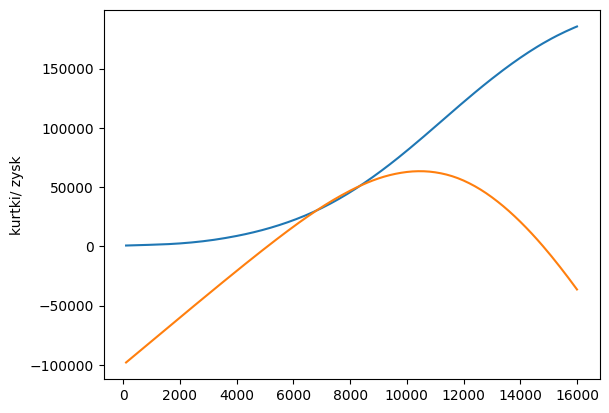

In [58]:
plt.cla()
plt.plot(eksper, [w[0] for w in wyniki], label = 'zysk')
plt.plot(eksper, [w[1] for w in wyniki], label = 'koszty')
plt.ylabel('kurtki/ zysk')
plt.legend
plt.show()

Text(0, 0.5, 'ryzyko')

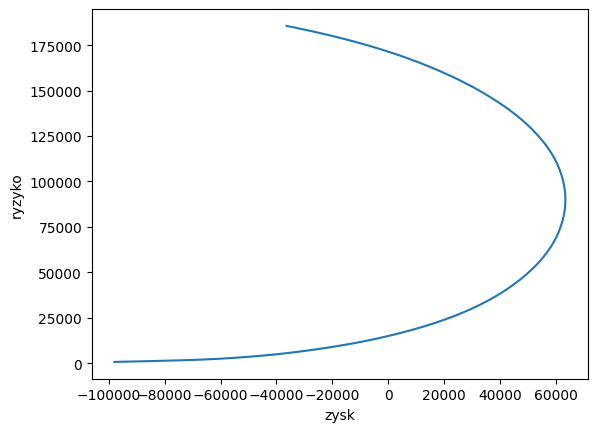

In [61]:
plt.cla()
plt.plot([w[1] for w in wyniki], [w[0] for w in wyniki])
plt.xlabel('zysk')
plt.ylabel('ryzyko')

In [89]:
optim = eksper[np.argmax([w[1] for w in wyniki])]

In [90]:
optim_res = symuluj(optim, 10000)
(np.mean(optim_res), np.std(optim_res))

(63428.27, 90744.9277434673)